In [1]:
!pip install boto3


In [17]:
import boto3
from boto3.s3.transfer import TransferConfig
from botocore.config import Config

# Step 1: Start a session
session = boto3.Session(
    aws_access_key_id='*****************',
    aws_secret_access_key='***************',
    region_name='us-east-2'
)

# Step 2: S3 configuration settings
client_config = Config(
    signature_version='s3v4',
    retries={'max_attempts': 10},
    s3={'addressing_style': 'path'}
)

# Step 3: Create the S3 client (note: verify is passed separately!)
s3 = session.client('s3', config=client_config, verify=False)

# Step 4: Configure for large file uploads
transfer_config = TransferConfig(multipart_threshold=100*1024*1024)

# Step 5: Upload the file
s3.upload_file(
    Filename=r'C:\Users\jayan\Downloads\flights_sample_3m.csv',
    Bucket='flight-delay-jayanthi',
    Key='raw/flights_sample_3m.csv',
    Config=transfer_config
)

print("✅ Upload complete!")


C:\Users\jayan\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 's3.us-east-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jayan\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 's3.us-east-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jayan\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 's3.us-east-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jayan\anaconda3\

✅ Upload complete!


In [21]:
pip install pandas pyarrow


Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd

# Step 1: Read CSV
df = pd.read_csv('C:/Users/jayan/Downloads/flights_sample_3m.csv')

# Optional: Drop unused columns or downsample
# df = df.sample(frac=0.1, random_state=42)

# Step 2: Save as Parquet
df.to_parquet('C:/Users/jayan/Downloads/flights_sample_3m.parquet', engine='pyarrow', compression='snappy')


In [25]:
import boto3

s3 = boto3.client('s3')
s3.upload_file(
    Filename='C:/Users/jayan/Downloads/flights_sample_3m.parquet',
    Bucket='flight-delay-jayanthi',
    Key='raw/flights_sample_3m.parquet'
)


In [ ]:
-- ML Via Local Jupyter --

In [27]:
pip install boto3 pandas scikit-learn pyarrow s3fs


INFO: pip is looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/

In [39]:
import pandas as pd

# Step 1: Start a session
session = boto3.Session(
    aws_access_key_id='************',
    aws_secret_access_key='***************',
    region_name='us-east-2'
)

df = pd.read_parquet('s3://flight-delay-jayanthi/processed/flights_sample_3m.parquet', engine='pyarrow')

# Preview the data
df.head()


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
----predict if a flight is delayed (arr_delay > 15 mins)---

In [50]:
# Sample 100,000 rows randomly for faster experimentation
df_sample = df.sample(n=100000, random_state=42)

# Continue with transformations
df_sample['delayed'] = df_sample['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)
features = ['CRS_DEP_TIME', 'DEP_DELAY', 'AIR_TIME', 'DISTANCE']
X = df_sample[features]
y = df_sample['delayed']


In [52]:
print(df.columns.tolist())


['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'delayed']


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Step 1: Select features and target from your DataFrame
df_model = df[['CRS_DEP_TIME', 'DEP_DELAY', 'AIR_TIME', 'DISTANCE', 'ARR_DELAY']].copy()

# Step 2: Create binary target column
df_model['delayed'] = df_model['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)

# Step 3: Define features and target
X = df_model[['CRS_DEP_TIME', 'DEP_DELAY', 'AIR_TIME', 'DISTANCE']]
y = df_model['delayed']

# Step 4: Impute missing values (fill NaNs)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Step 6: Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
predictions = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, predictions))


✅ Accuracy: 0.9365522222222222


In [ ]:
Check Confusion Matrix
Helps understand true/false positives and false/true negatives


Matplotlib is building the font cache; this may take a moment.


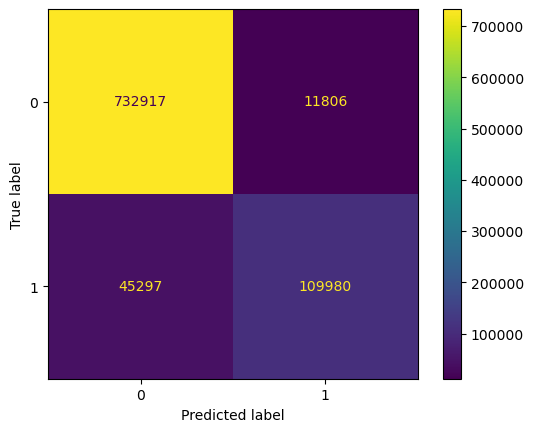

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
 Visualize Feature Impact
Check which features most influence the prediction

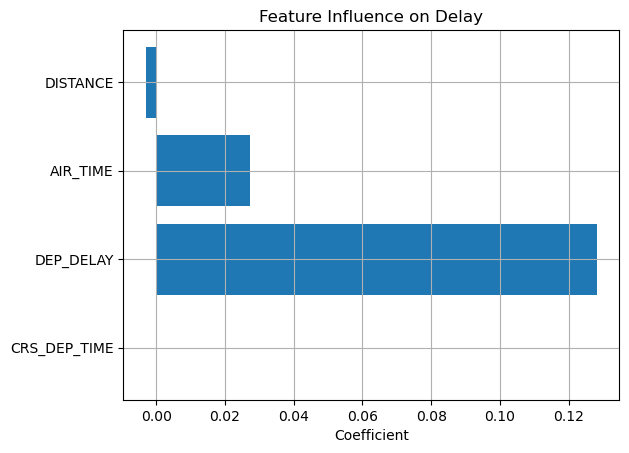

In [64]:
import matplotlib.pyplot as plt

feature_names = ['CRS_DEP_TIME', 'DEP_DELAY', 'AIR_TIME', 'DISTANCE']
coef = model.coef_[0]

plt.barh(feature_names, coef)
plt.title("Feature Influence on Delay")
plt.xlabel("Coefficient")
plt.grid(True)
plt.show()


NameError: name 'flight' is not defined

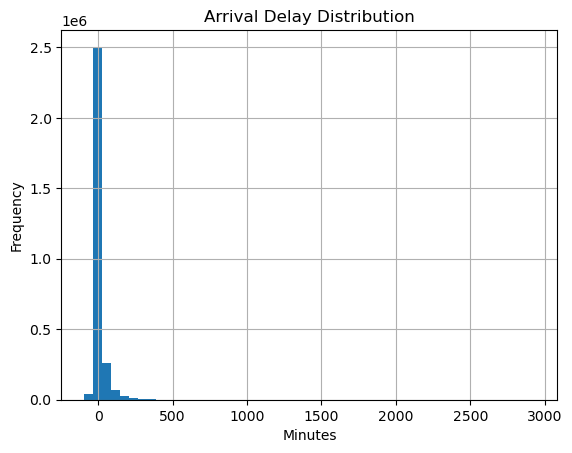

In [70]:
df_model['ARR_DELAY'].hist(bins=50)
plt.title("Arrival Delay Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.savefig("arrival_delay_distribution.png")
s3.upload_file("arrival_delay_distribution.png",flight-delay-jayanthi, "visuals/arrival_delay_distribution.png")


NameError: name 'bucket_name' is not defined

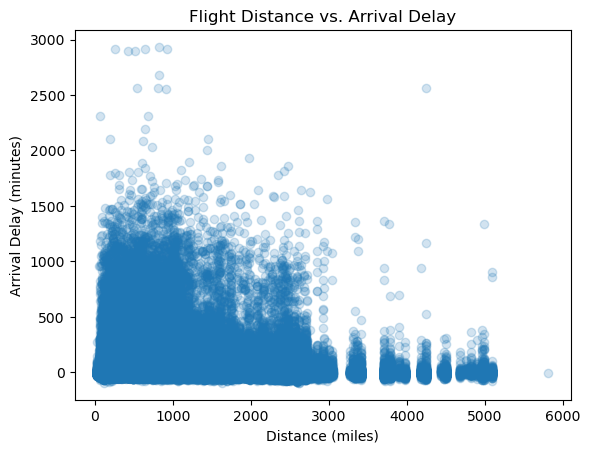

In [72]:
plt.scatter(df_model['DISTANCE'], df_model['ARR_DELAY'], alpha=0.2)
plt.title("Flight Distance vs. Arrival Delay")
plt.xlabel("Distance (miles)")
plt.ylabel("Arrival Delay (minutes)")
plt.savefig("distance_vs_delay.png")
s3.upload_file("distance_vs_delay.png", bucket_name, "visuals/distance_vs_delay.png")


In [84]:
import boto3

session = boto3.Session(
    aws_access_key_id='************',
    aws_secret_access_key='**********',
    region_name='us-east-2'  # or your correct region
)

s3 = session.client('s3')
s3.upload_file("predictions.csv", "flight-delay-jayanthi", "results/predictions.csv")
